
# Diseño de software para cómputo científico

----

## Unidad 1: Paradigma orientado a objetos (OOP)



### Agenda de la Unidad 1
---

- Clase 1:
    - Diferencias entre alto y bajo nivel.
    - Lenguajes dinámicos y estáticos.
    
- Limbo:
    - Introducción al lenguaje Python.
    - Librerías de cómputo científico.
    
- Clase Limbo + 1 y Limbo + 2:
    - **Orientación a objetos**, decoradores.

### Aclaraciónes previas

---

- Existen muchos paradigmas de programacion pero pocos lenguajes que implementan uno solo:
    - Funcional (Haskell)
    - Procedural (ASM, C)
    - Lógico (Prolog)
    - Orientado a objetos (Smalltalk)
- La mayoría de los lenguajes modernos son multiparadigma.
- Pero casi todos los lenguajes se implementan sobre un paradigma en particular.
- Python se implementa sobre OOP.
- La mayoria de los cientificos sabe programar en algun lenguaje proceduralmente.    

### Aclaraciónes previas

---

- El OOP no es la verdad de la milanesa.
- Soluciona algunas cosas y fue el gran motor del crecimiento de software en los 90 hasta ahora.

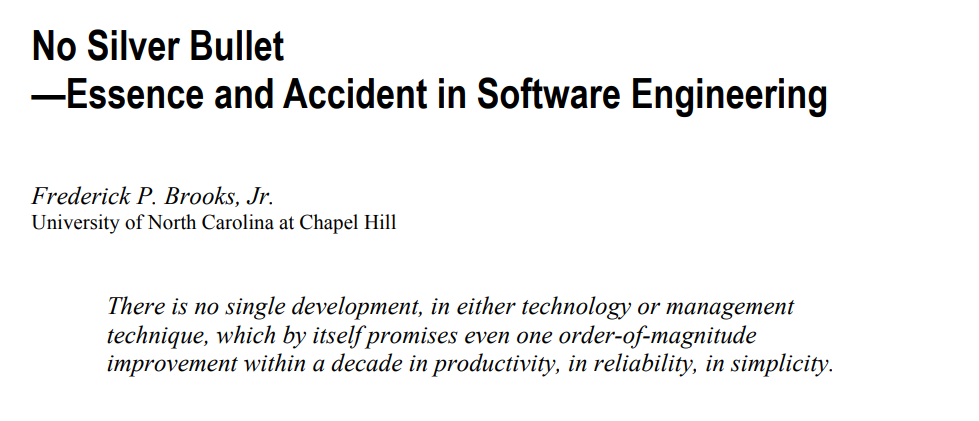

## Vamos con un ejemplo procedural

----

Representemos una persona con un diccionario

In [1]:
persona = {
    "nombre": "tito",
    "sexo": "masculino",
    "edad": 10, 
    "altura": 1.60}

Hagamos un validador de los tipos de persona

In [2]:
def validar_persona(p):
    nombre, sexo = p.get("nombre"), p.get("sexo")
    edad, altura = p.get("edad"), p.get("altura")
    return (
        type(nombre) == str and nombre and
        sexo in ("masculino", "femenino") and
        type(edad) == int and (0 < edad < 120) and
        type(altura) == float and (.2 <= altura <= 2.30))
        
validar_persona(persona)

True

### Pero tu jefe te cambia los requerimientos
---

```python
def validar_persona(p):
    nombre, genero = p.get("nombre"), p.get("género")
    edad, altura = p.get("edad"), p.get("altura")
    return (
        type(nombre) == str and nombre and
        genero in ("varón", "mujer") and
        type(edad) == int and (0 < edad < 120) and
        type(altura) == float and (.2 <= altura <= 2.30))
```

<small>Siglo XXI, quiero que soportes 70 generos como facebook.</small>

<small>Quiero trabajar internacionalmente</small>

<small>Solo operamos a mayores de edad segun el pais.</small>

<small>Las medidas de altura son en centímetros.<small>

### Cual es el problema?
----------

- Los requerimientos cambian.
- Los programas representan normalmente abstracciones de algun problema.
- El acoplamiento es un problema semantico y no sintactico.

> el **acoplamiento** es la forma y nivel de interdependencia entre módulos de software; una medida de qué tan   
> cercanamente conectados están dos rutinas o módulos de software; así como el grado de fuerza de la relación  
> entre módulos.
>  
> El acoplamiento está comúnmente contrastado con la **cohesión**. Un bajo acoplamiento normalmente se 
> correlaciona con una alta cohesión. El bajo acoplamiento es una señal de un sistema de un buen diseño de 
> software.

### Soluciones
----

Este es el problema que suele solucionar el OOP.

¿alguna idea? (Piensen out of the box)

- Volvamos al acoplamiento mas evidente.
- Hagamoslo mas sintactico.

## POO
---

Vamos de a poco formalizando (En el sentido ingenieril de la palabra)

**Estos son datos, guardan algun estado que representan a la persona**

```python
persona = {
    "nombre": "tito", "sexo": "masculino",
    "edad": 10, "altura": 1.60}
    ```
    
**Esto es "logica", representan algun tipo de comportamiento que se puede hacer al manipular los datos**

```python
def validar_persona(p):
    nombre, sexo = p.get("nombre"), p.get("sexo")
    edad, altura = p.get("edad"), p.get("altura")
    return (...)
```

**Tanto los datos como la lógica se guardan cada una en un lugar único de memoria que se accede por su nombre**

In [3]:
hex(id(persona)), hex(id(validar_persona))

('0x7f6f3c931750', '0x7f6f3c92ff28')

### POO - Definición formal
----

Un objeto es algo que tiene

- Estado
- Comportamiento
- Identitad

```ipython
>>> p0 = Persona(nombre="tito", sexo= "masculino", edad=10, altura=1.6)
>>> p0.nombre, p0.validar()
("tito", True)
>>> p1 = Persona(nombre="tito", sexo= "masculino", edad=10, altura=1.6)
>>> p1.nombre, p0.validar()
("tito", True)
>>> hex(id(p0)), hex(id(p1))
('0x7f61680be120', '0x7f6168044b85')
```

### POO - Clases
----

- Se pueden implementar objetos de varias formas. 
- Python implementa objetos con **clases** (`class`).
- Una clase es un **blue-print** (plano) de objetos similares.
- Las clases **instancian** (crean) objetos.
- En Python las clases son objetos (de hecho **TODO** es un objeto en Python).

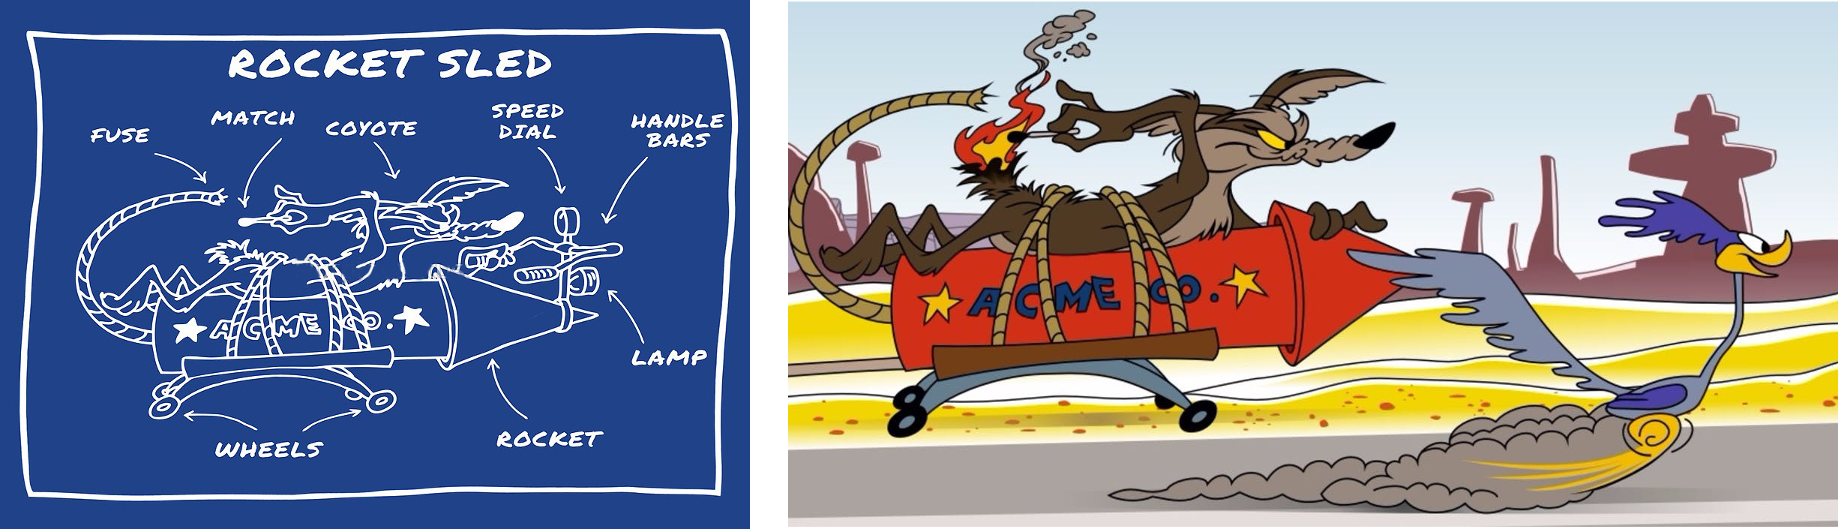

POO - Clases - Estado e identidad
----

In [7]:
class Persona:
    def __init__(self, nombre, sexo, edad, altura):
        self.nombre = nombre
        self.sexo = sexo
        self.edad = edad
        self.altura = altura

In [13]:
Persona("tito", "masculino", 10, 1.60), Persona("tito", "masculino", 10, 1.60)

(<__main__.Persona at 0x7f6f3c90ab00>, <__main__.Persona at 0x7f6f3c90a0f0>)

### POO - Clases - Comportamiento

In [14]:
class Persona:
    def __init__(self, nombre, sexo, edad, altura):
        self.nombre = nombre
        self.sexo = sexo
        self.edad = edad
        self.altura = altura
        
    def validar(self):
        return (
            type(self.nombre) == str and self.nombre and
            self.sexo in ("masculino", "femenino") and
            type(self.edad) == int and (0 < self.edad < 120) and
            type(self.altura) == float and (.2 <= self.altura <= 2.30))

p = Persona("tito", "masculino", 10, 1.60)
p.validar()

True

### POO - Clases - Mejorando

la funcion `isinstance(obj, clase)` verifica si un objeto es de una clase dada

In [17]:
class Persona:
    def __init__(self, nombre, sexo, edad, altura):
        self.nombre = nombre
        self.sexo = sexo
        self.edad = edad
        self.altura = altura
        
    def validar(self):
        return (
            isinstance(self.nombre, str) and self.nombre and
            self.sexo in ("masculino", "femenino") and
            isinstance(self.edad, int) and (0 < self.edad < 120) and
            isinstance(self.altura, float) and (.2 <= self.altura <= 2.30))

p = Persona("tito", "masculino", 10, 1.60)
p.validar()

True

## POO - Propiedades
---

- Encapsulamiento.
- Herencia.
- Polimorfismo.

### POO - Propiedades - *Encapsulamiento*

---

Se refiere a dos dos conceptos separados pero distintos, y en algunos casos a los dos al mismo tiempo:

- La capacidad del lenguaje para mezclar datos y metodos que operan sobre estos datos.
- Un mecanismo del lenguaje para restringir la modificacion de los componentes del objeto.

Cada objeto está aislado del exterior, es un módulo natural, y la aplicación entera se reduce a un agregado o rompecabezas de objetos. El aislamiento protege a los datos asociados de un objeto contra su modificación por quien no tenga derecho a acceder a ellos, eliminando efectos secundarios e interacciones.

### POO - Propiedades - *Encapsulamiento*

---

```java
import org.apache.commons.text.WordUtils;

public class Persona {
    private String nombre;
    
    public Persona(int nombre){
        this.nombre = WordUtils.capitalizeFully(nombre);
    }
    
    public String getNombre(){
        return this.nombre;
    }
    
    public void setNombre(String nombre){
        this.nombre = WordUtils.capitalizeFully(nombre);
    }
}
```

### POO - Propiedades - *Encapsulamiento*

---

**Esto no anda**
```java
Persona p = new Persona("tito");
p.nombre = "toto";
p.nombre;
```

**Esto si anda**

```java
Persona p = new Persona("tito");
p.setNombre("toto carloto");
p.getNombre(); // Toto Carloto
```

### POO - Propiedades - *Encapsulamiento*

---

- Python no tiene nada parecido a lo que tiene Java/C++/C#
- En remplazo tenemos algunos name mangling y **propiedades**

Las cosas privadas empiezan con un under_score (pero nunca empiezan y terminan con 2)

In [3]:
class Persona:
    def __init__(self, nombre):
        self.__nombre = nombre.title() # esto se considera privado
        
    @property
    def nombre(self):
        return self.__nombre
        
    @nombre.setter
    def nombre(self, nombre):
         self.__nombre = nombre.title()

### POO - Propiedades - *Encapsulamiento*

---

In [15]:
p = Persona("tito")
p.nombre = "toto carloto"
p.nombre

'Toto Carloto'

In [16]:
p.__nombre

AttributeError: 'Persona' object has no attribute '__nombre'

In [10]:
print(dir(p))

['_Persona__nombre', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__nombre', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'nombre']


### POO - Propiedades - *Encapsulamiento*

---

En la practica suele usarse uno, para que si alguien quiera usar estos atributos privados, los haga bajo su propio riesgo

In [17]:
class Persona:
    def __init__(self, nombre):
        self._nombre = nombre.title() # esto se considera privado
        
    @property
    def nombre(self):
        return self._nombre
        
    @nombre.setter
    def nombre(self, nombre):
         self._nombre = nombre.title()

In [18]:
p = Persona("tito")
p.nombre = "toto carloto"
print(p.nombre)

p._nombre = "coso"
print(p.nombre)

Toto Carloto
coso


POO - Propiedades - Herencia
----